# Introduction

Textual data is so rich in semantics and grammatical rules. Vectorizing texts while encoding all this information and knowledge is not straightforward. Up until now, embeddings have been the most convenient way to vectorize texts. <br>
Text embeddings are a dictionary with the keys being the words and the values being the vectors representing these words. In other words, to vectorize a phrase with three words, we fetch each word's vector from the embedding dictionary and either sum/average/concatenate/etc., these vectors.  

## Objective
This notebook aims to guide you through training your embeddings. <br>
While pre-trained embeddings are more available nowadays, they do not always fit the problem we have at hand. <br>
Medical textual data differs from Twitter conversations, google reviews, etc.,. Thus, we need to train our own embeddings to learn the contextual semantics of our dataset.

## Tasks
This notebook contains code you simply need to run and code cells you need to fill in. <br>
No code from your side is required in code blocks where you see the mention *run only*. <br>
When you see the mention *code*, a chunk of code is required from your side. <br>
When you see the mention *comment*, you will need to write a comment/an explication/ an analysis about the subject at hand. 

# 1. Load Wikipedia Corpus (*run only*)

In [1]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.corpora import WikiCorpus
path_to_wiki_dump = datapath("enwiki-latest-pages-articles1.xml-p000000010p000030302-shortened.bz2")
corpus_path = get_tmpfile("wiki-corpus.mm")
wiki = WikiCorpus(path_to_wiki_dump)
sentences = list(wiki.get_texts())

/Users/joseph/opt/anaconda3/lib/python3.9/site-packages/gensim/utils.py:1332: UserWarning: detected OSX with python3.8+; aliasing chunkize to chunkize_serial
  warnings.warn("detected %s; aliasing chunkize to chunkize_serial" % entity)


# 2. Word2vec skipgram - dimension of the word vectors = 50
## 2.1 Train word2vec with skipgram(*code*)

In [2]:
#sentences

In [3]:
from gensim.models import Word2Vec

skipgram_model = Word2Vec(sentences, vector_size=50, sg=1)

## 2.2 Print the first 20 words in the vocabulary (*code*)

In [4]:
print(skipgram_model.wv.index_to_key[:20])

['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that', 'with', 'was', 'on', 'are', 'from', 'an', 'or', 'it', 'at', 'be']


## 2.3 Print the embeddings vector for the words "education" and "algorithm" (*code*)

In [5]:
edu_embed = skipgram_model.wv['education']

print("Embedding vector for 'education':\n", edu_embed)

Embedding vector for 'education':
 [-0.8856122   0.11236124 -0.00905043  0.21371566 -0.2811928  -0.30415303
  0.3145828   0.95412964 -0.14942692  0.11428099 -0.05023185 -0.21649551
  0.18690158 -0.36171424  0.17369774  0.12300915  0.46471405  0.376219
 -0.20262223 -0.07450424  0.43755278 -0.1011982   0.44551802 -0.18862905
 -0.00588962  0.47320104 -0.54092     0.5820081  -0.5514507  -0.52293575
 -0.00933866  0.7780722   0.33060288  0.27883798 -0.4121954   0.33338654
 -0.01291495  0.09827366 -0.01874331 -0.03286124  0.0374966  -0.03550981
 -0.00901006  0.5309002  -0.2994879  -0.26618445 -0.01200298 -0.28686517
 -0.4066384   0.09079028]


In [6]:
algo_embed = skipgram_model.wv['algorithm']

print("Embedding vector for 'algorithm':\n", algo_embed)

Embedding vector for 'algorithm':
 [ 1.8552300e-01  7.1375209e-01 -6.4265810e-02 -4.7392759e-01
 -6.5542608e-01 -4.4506925e-01 -2.0331050e-01  1.5975155e-01
 -3.6672327e-01 -1.6620320e-01  8.9277536e-02  2.6546089e-02
  9.7498482e-01 -2.3046838e-01 -1.7698576e-01  2.6786646e-02
  6.6317433e-01  4.5259967e-01 -4.4803393e-01 -2.3438232e-01
 -2.6839610e-02  2.2430329e-02  2.3227733e-01 -3.4519172e-01
 -4.5922703e-01 -2.9802436e-01 -4.2602149e-01 -2.6836315e-01
 -4.5306113e-02 -2.8021798e-01  3.8392290e-01 -4.3368065e-01
 -7.1396291e-02  6.2272185e-01 -2.5806034e-01 -4.0835110e-04
 -7.4220508e-01 -2.3176606e-01 -4.0786377e-01 -1.4341623e-01
  2.8339922e-01 -4.5246925e-02  5.0444853e-01  6.6849238e-01
  6.0000849e-01  1.2437207e-01 -4.2484850e-02 -5.1008320e-01
 -7.2688609e-02 -3.4726092e-01]


## 2.4 Print the similarity between the words (*code*):
- "education" and "algorithm"
- "education" and "latin"
- "education" and "age"
- "education" and "death"
- "spanish" and "latin"

In [7]:
print("Similarity between 'education' and 'algorithm':", skipgram_model.wv.similarity('education', 'algorithm'))
print("Similarity between 'education' and 'latin':", skipgram_model.wv.similarity('education', 'latin'))
print("Similarity between 'education' and 'age':", skipgram_model.wv.similarity('education', 'age'))
print("Similarity between 'education' and 'death':", skipgram_model.wv.similarity('education', 'death'))
print("Similarity between 'spanish' and 'latin':", skipgram_model.wv.similarity('spanish', 'latin'))

Similarity between 'education' and 'algorithm': 0.22313005
Similarity between 'education' and 'latin': 0.18341264
Similarity between 'education' and 'age': 0.47068635
Similarity between 'education' and 'death': 0.2939909
Similarity between 'spanish' and 'latin': 0.62692904


## 2.5 Save the embeddings (*code*)

In [8]:
skipgram_model.wv.save_word2vec_format('skipgram_embeddings.txt')

# 3. Word2vec cbow - dimension of the word vectors = 50
## 3.1 Train word2vec with cbow(*code*)

In [9]:
cbow_model = Word2Vec(sentences, vector_size=50, sg=0)

## 3.2 Print the first 20 words in the vocabulary (*code*)

In [10]:
print(cbow_model.wv.index_to_key[:20])

['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that', 'with', 'was', 'on', 'are', 'from', 'an', 'or', 'it', 'at', 'be']


## 3.3 Print the embeddings vector for the words "education" and "algorithm" (*code*)

In [11]:
edu_embed = cbow_model.wv['education']

print("Embedding vector for 'education':\n", edu_embed)

Embedding vector for 'education':
 [-0.4816481  -0.16342235 -0.02817639 -0.1617307  -0.15805632 -0.7528784
  0.70859337  0.83414096 -0.31612933  0.00779895 -0.17636472 -0.5425917
  0.14956865  0.15422684 -0.1470828   0.31747487  0.7819495   0.3761018
 -0.55391246 -1.1618221   0.35679635  0.01610503  0.29317045 -0.3350759
  0.12261242  0.2773755  -0.517221    0.11053765 -0.252177   -0.5339516
  0.00514053  0.15785223  0.35468763 -0.2619064  -0.6787749   0.18343817
  0.7351248  -0.1787999  -0.24136576 -0.44198284  0.6168153  -0.40330485
 -0.43706584  0.7827651   0.29103023 -0.03103457 -0.266089   -1.0011479
  0.08514579  0.7247835 ]


In [12]:
algo_embed = cbow_model.wv['algorithm']

print("Embedding vector for 'algorithm':\n", algo_embed)

Embedding vector for 'algorithm':
 [-0.2524211   0.55739886  0.04271225 -0.5857855  -0.32808968 -0.81913495
  0.2270557   0.49521416 -0.19876474 -0.06833161 -0.4065207  -0.3448622
  0.8075838  -0.03259966 -0.21569094  0.21362635  1.1974579   0.5676951
 -0.98222566 -1.1340498  -0.07367     0.244934    0.35897893 -0.2809874
 -0.44195062  0.08489799 -0.45585975 -0.452006    0.23875923 -0.20433812
  0.06009442 -0.39991665  0.24684401  0.10093327 -0.7246305  -0.2642503
  0.35833102 -0.19016223 -0.4550447  -0.35835642  0.86777383 -0.14501546
  0.36962998  0.8295267   0.7384536   0.1649085  -0.3642207  -0.83175695
 -0.1737308   0.5341666 ]


## 3.4 Print the similarity between the words (*code*):
- "education" and "algorithm"
- "education" and "latin"
- "education" and "age"
- "education" and "death"
- "spanish" and "latin"

In [13]:
print("Similarity between 'education' and 'algorithm':", cbow_model.wv.similarity('education', 'algorithm'))
print("Similarity between 'education' and 'latin':", cbow_model.wv.similarity('education', 'latin'))
print("Similarity between 'education' and 'age':", cbow_model.wv.similarity('education', 'age'))
print("Similarity between 'education' and 'death':", cbow_model.wv.similarity('education', 'death'))
print("Similarity between 'spanish' and 'latin':", cbow_model.wv.similarity('spanish', 'latin'))

Similarity between 'education' and 'algorithm': 0.76902676
Similarity between 'education' and 'latin': 0.94462174
Similarity between 'education' and 'age': 0.9365392
Similarity between 'education' and 'death': 0.91968286
Similarity between 'spanish' and 'latin': 0.9128626


## 3.5 Save the embeddings (*code*)

In [14]:
cbow_model.wv.save_word2vec_format('cbow_embeddings.txt')

# 4. Visualizing Embeddings
## 4.1 SkipGram Model
### 4.1.1 Set the variable *model* to the skipgram word2vec model trained and saved in section 2 (*code*)

In [15]:
model = skipgram_model

### 4.1.2 Clean the model's vocabulary from stopwords using the nltk library (*code*)
**NB:** if you did not know how to do this part, set the variable *words_vocab_without_sw* to *list(model.wv.index_to_key )*  i.e.  <br>

```
words_vocab_without_sw = list(model.wv.index_to_key )
```

In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

words_vocab = list(model.wv.index_to_key )
print("Size of Vocabulary before Stop Words removal:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:10])

words_vocab_without_sw = [word for word in list(model.wv.index_to_key) if word.lower() not in stop_words]
print("Size of Vocabulary after Stop Words removal:",len(words_vocab_without_sw))
print("Few words in Vocabulary",words_vocab_without_sw[:10])

Size of Vocabulary before Stop Words removal: 9002
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that']
Size of Vocabulary after Stop Words removal: 8881
Few words in Vocabulary ['also', 'one', 'first', 'state', 'used', 'two', 'may', 'many', 'new', 'time']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joseph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4.1.3 Visualizing the words that are semantically close to ['education', 'country', 'medicine', 'sports', 'movie'] using the Skipgram model (*run only*)

#### Hyperparameters of TSNE

1. n_components: the dimension of the value space.
2. perplexity: the number of neighbours.
3. n_iter: the maximum number of iterations for the optimization.
4. init: the embedding's initialization.

t-SNE requires good amount of hyperparameter tuning to give effective results.  <br>
References: <br>
- [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). 
- [Article](https://distill.pub/2016/misread-tsne/)

In [17]:
from sklearn.manifold import TSNE
import numpy as np, matplotlib.pyplot as plt, matplotlib.cm as cm
%matplotlib inline 
def cluster_words(model, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie']):
    embedding_clusters = []
    word_clusters = []

    for word in cluster_key_words:
        embeddings_of_words_similar_to_key_word = []
        words_similar_to_key_word = []
        for similar_word, _ in model.wv.most_similar(word, topn=30):
            words_similar_to_key_word.append(similar_word)
            embeddings_of_words_similar_to_key_word.append(model.wv[similar_word])
        embedding_clusters.append(embeddings_of_words_similar_to_key_word)
        word_clusters.append(words_similar_to_key_word)

    print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word
    print("we have {} clusters".format(len(word_clusters)))
    print("Word in Cluster 1 of EDUCATION :",word_clusters[1])
    embedding_clusters = np.array(embedding_clusters)
    n, m, k = embedding_clusters.shape #geting the dimensions
    tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it
    return  embeddings_en_2d, word_clusters

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

Embedding clusters: [-0.6369859  -0.05288473  0.05487465  0.11035456 -0.23028444 -0.39121717
  0.256122    0.9399032  -0.09332184  0.19366981 -0.1056643  -0.26791212
  0.06843287 -0.32123572  0.05930093  0.21580757  0.18039316  0.12334744
 -0.30361596 -0.19444256  0.50278157  0.09607036  0.36074936 -0.18574734
  0.13656953  0.5307607  -0.74621636  0.52820635 -0.37064072 -0.34279746
 -0.05224066  0.6768488   0.31428677  0.21586122 -0.37123698 -0.06615235
 -0.00530747  0.02120249  0.03430016 -0.00769648  0.22373511  0.05149627
  0.05899716  0.28755933 -0.1795407  -0.1572008  -0.06333654 -0.3137449
 -0.16436547  0.04802578]
we have 5 clusters
Word in Cluster 1 of EDUCATION : ['cities', 'province', 'inhabitants', 'metropolitan', 'continent', 'rural', 'districts', 'populous', 'borough', 'reserves', 'centers', 'urban', 'economy', 'southeastern', 'financial', 'towns', 'revenue', 'provinces', 'highest', 'sport', 'americas', 'nation', 'dominated', 'km', 'vast', 'roughly', 'budget', 'currency', 

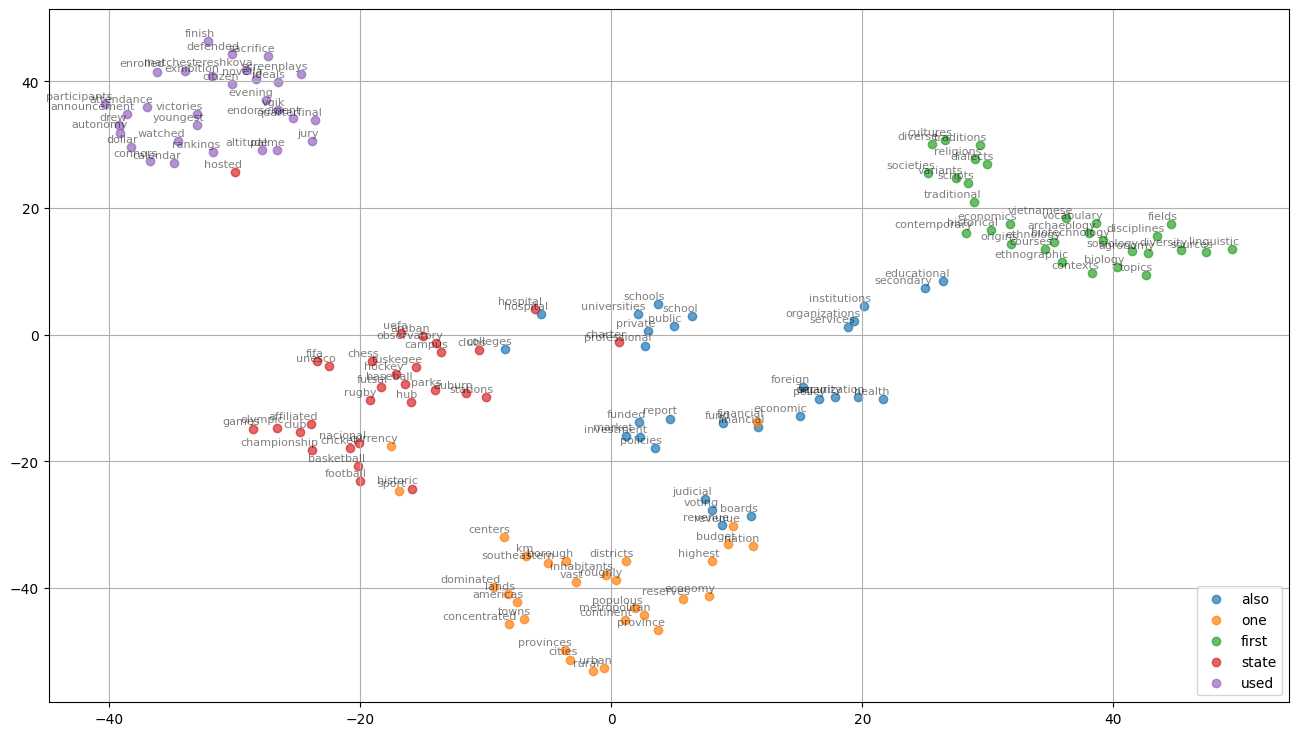

In [18]:
embeddings_en_2d, word_clusters = cluster_words(model, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie'])
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

## 4.2 CbOW
### 4.2.1 Set the variable *model* to the cbow word2vec model trained and saved in section 3 (*code*)

In [19]:
model = cbow_model

### 4.2.2 Clean the model's vocabulary from stopwords using the nltk library (*code*)
**NB:** if you did not know how to do this part, set the variable *words_vocab_without_sw* to *list(model.wv.index_to_key )*  i.e.  <br>

```
words_vocab_without_sw = list(model.wv.index_to_key )
```

In [20]:
words_vocab = list(model.wv.index_to_key )
print("Size of Vocabulary before Stop Words removal:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:10])


words_vocab_without_sw = [word for word in list(model.wv.index_to_key) if word.lower() not in stop_words]
print("Size of Vocabulary after Stop Words removal:",len(words_vocab_without_sw))
print("Few words in Vocabulary",words_vocab_without_sw[:10])

Size of Vocabulary before Stop Words removal: 9002
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that']
Size of Vocabulary after Stop Words removal: 8881
Few words in Vocabulary ['also', 'one', 'first', 'state', 'used', 'two', 'may', 'many', 'new', 'time']


### 4.2.3 Visualizing the words that are semantically close to ['education', 'country', 'medicine', 'sports', 'movie'] using the CBoW model (*run only*)

Embedding clusters: [-6.1624873e-01 -1.6041146e-01  1.5410236e-02 -1.1447075e-01
 -2.2032426e-01 -8.2546669e-01  7.3641878e-01  9.2939943e-01
 -3.3981097e-01 -3.3129295e-04 -2.4799938e-01 -5.9654075e-01
  2.5107738e-01  2.2716895e-01 -1.0616552e-01  3.4205928e-01
  8.6685294e-01  5.3790319e-01 -5.5929989e-01 -1.1962823e+00
  4.3429518e-01  1.0375869e-01  3.9076856e-01 -3.5864893e-01
  9.9066541e-02  2.8768948e-01 -5.8134240e-01  1.8711421e-01
 -2.5602183e-01 -7.2539157e-01 -2.7507376e-02  1.2016318e-01
  3.4689313e-01 -1.6467640e-01 -7.0670909e-01  1.3467243e-01
  7.3085916e-01 -2.9372108e-01 -3.0381691e-01 -4.0826374e-01
  6.2048906e-01 -4.0690205e-01 -4.7908229e-01  7.8777421e-01
  3.6811057e-01  2.7629130e-02 -3.2323217e-01 -1.0105259e+00
  8.2062945e-02  7.2560966e-01]
we have 5 clusters
Word in Cluster 1 of EDUCATION : ['population', 'area', 'highest', 'province', 'government', 'economy', 'region', 'nation', 'rest', 'member', 'lowest', 'census', 'assembly', 'azerbaijan', 'members'

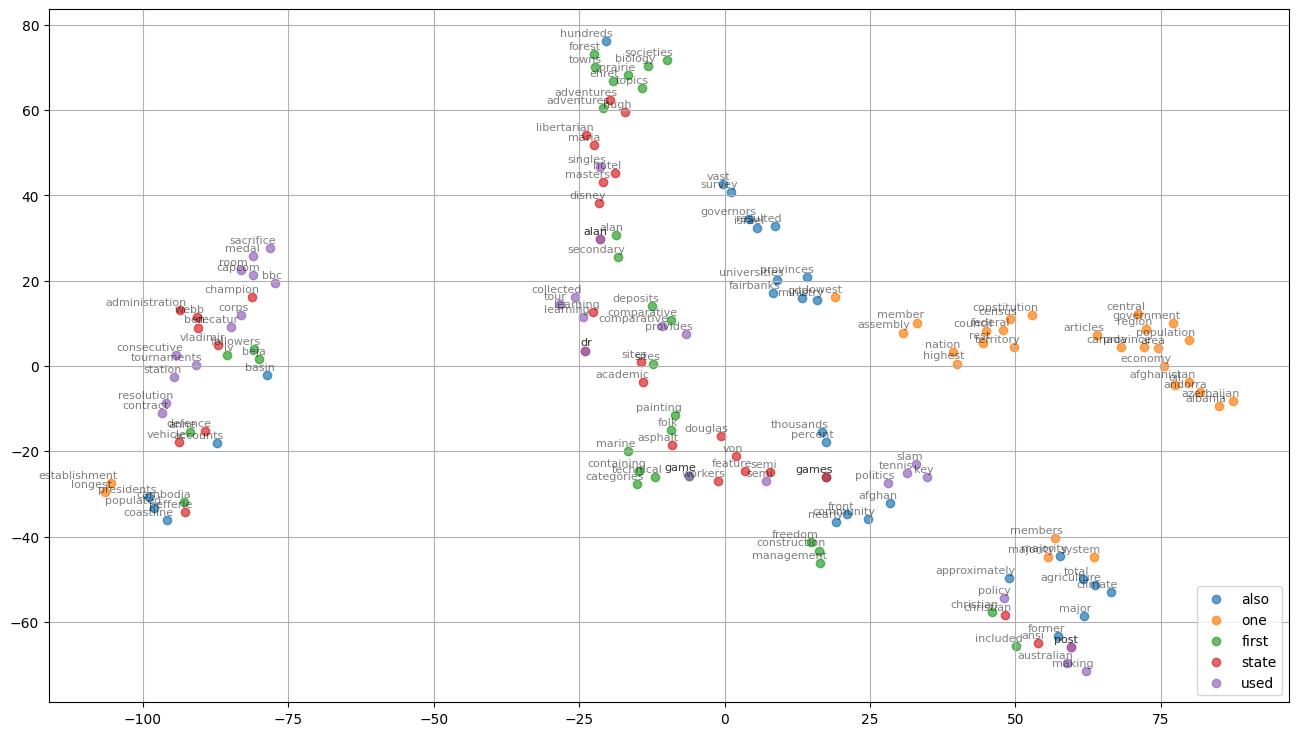

In [21]:
embeddings_en_2d, word_clusters = cluster_words(model, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie'])
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

## 4.3 Compare the two figures in section 4.1.3 and 4.2.3 and comment (*comment*)

The skipgram model performed much better than the cbow model according to the figures. This is because skipgram takes a target word as input and tries to predict the context words that surround it. The skipgram approach is more effective especially for rare words because it trains the network to consider the context of each word individually, which is why it performed better at finding words associated to the target word.

On the other hand, the cbow model takes the context of a target word as input and tries to predict the target word. This is why the word clusters in the cbow model figure were all over the place. If we look at the cbow model's list of words in cluster 1 of education, we see words like 'oil' and 'constitution', which does not seem as relevant to education, as compared to the list of words in the skipgram model's cluster of education.